In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [10]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [11]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [12]:
df.head(3)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131662 entries, T0005689460 to T0005908514
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  111452 non-null  object 
 2   Customer_Since_Months        125742 non-null  float64
 3   Life_Style_Index             111469 non-null  float64
 4   Confidence_Life_Style_Index  111469 non-null  object 
 5   Destination_Type             131662 non-null  object 
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         60632 non-null   float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  object 
 12  Surge_Pricing_Type           131662 non-null  in

In [14]:
df.isnull().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [15]:
catigorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(exclude='object').columns

In [16]:
for feature in catigorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [17]:
for feature in numerical_features:
    df[feature] = df[feature].fillna(df[feature].median())

In [18]:
df = pd.get_dummies(df, columns=catigorical_features, drop_first=True, dtype='int64')

In [19]:
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
T0005689465,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_Distance,1.000000,0.114413,0.468332,-0.054654,-0.007686,-0.031388,0.200456,0.231706,0.135928,-0.049238,...,0.010783,-0.078761,-0.065450,-0.067025,-0.070772,-0.032169,0.006428,-0.009844,-0.027335,0.002173
Customer_Since_Months,0.114413,1.000000,0.119279,-0.048969,-0.006180,-0.000977,0.041814,0.110851,0.027194,-0.002355,...,-0.020596,-0.023704,-0.005812,-0.038896,0.001861,-0.033298,-0.011319,0.001978,-0.021416,0.001326
Life_Style_Index,0.468332,0.119279,1.000000,0.189165,0.068188,-0.045710,0.215944,0.303324,-0.073692,-0.002509,...,0.021958,-0.027208,-0.008661,-0.018124,-0.015995,-0.006097,0.003144,0.008153,-0.026124,0.000626
Customer_Rating,-0.054654,-0.048969,0.189165,1.000000,0.003595,-0.005398,-0.302968,-0.227531,-0.155279,0.027020,...,0.055861,0.058156,0.012988,0.022421,0.012134,0.027700,0.033101,0.010281,0.018762,0.000468
Cancellation_Last_1Month,-0.007686,-0.006180,0.068188,0.003595,1.000000,0.011711,0.095830,0.128686,0.185646,-0.051113,...,0.028450,0.004040,0.002679,0.007901,0.002417,0.011404,0.037134,0.003636,0.004370,0.002307
Var1,-0.031388,-0.000977,-0.045710,-0.005398,0.011711,1.000000,-0.025133,-0.020892,-0.013754,0.008309,...,-0.006899,0.003675,-0.001149,0.000149,0.003012,0.002711,0.002638,0.000995,-0.005564,0.000619
Var2,0.200456,0.041814,0.215944,-0.302968,0.095830,-0.025133,1.000000,0.683437,0.003437,-0.007217,...,-0.032692,-0.042712,-0.016374,-0.024090,-0.020074,-0.017317,-0.015042,-0.002572,-0.011555,0.003183
Var3,0.231706,0.110851,0.303324,-0.227531,0.128686,-0.020892,0.683437,1.000000,-0.039309,-0.003357,...,-0.025378,-0.034315,-0.007976,-0.025787,-0.016411,-0.028876,-0.007760,-0.004894,-0.016493,0.003520
Surge_Pricing_Type,0.135928,0.027194,-0.073692,-0.155279,0.185646,-0.013754,0.003437,-0.039309,1.000000,-0.155982,...,0.042104,-0.038719,0.025339,0.031573,0.017857,0.002884,0.012672,0.005622,-0.014436,0.000872
Type_of_Cab_B,-0.049238,-0.002355,-0.002509,0.027020,-0.051113,0.008309,-0.007217,-0.003357,-0.155982,1.000000,...,-0.014112,-0.000101,-0.013176,-0.011938,-0.010108,-0.000693,-0.005531,-0.002502,0.001017,-0.000635


In [21]:
corr_matrix = df.corr()
corr_unstacked = corr_matrix.unstack()
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) < corr_unstacked.index.get_level_values(1)]
sorted_corr = corr_unstacked.sort_values(ascending=False)

pd.DataFrame(sorted_corr, columns=['corr']).reset_index().round(3)

,level_0,level_1,corr
0,Var2,Var3,0.683
1,Life_Style_Index,Trip_Distance,0.468
2,Surge_Pricing_Type,Type_of_Cab_D,0.334
3,Life_Style_Index,Var3,0.303
4,Trip_Distance,Var3,0.232
...,...,...,...
401,Type_of_Cab_B,Type_of_Cab_E,-0.249
402,Customer_Rating,Var2,-0.303
403,Type_of_Cab_B,Type_of_Cab_D,-0.328
404,Type_of_Cab_B,Type_of_Cab_C,-0.417


### Training

In [22]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()),
                 ('clf', OneVsRestClassifier(LogisticRegression()))])

In [51]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', OneVsRestClassifier(estimator=LogisticRegression()))])

In [52]:
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [59]:
param_grid = {'clf__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'clf__estimator__C': [0.001, 0.01, 0.1, 1]}

In [61]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid)

In [62]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        OneVsRestClassifier(estimator=LogisticRegression()))]),
             param_grid={'clf__estimator__C': [0.001, 0.01, 0.1, 1],
                         'clf__estimator__penalty': ['l1', 'l2', 'elasticnet']})

In [64]:
print(classification_report(y_test, grid.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



In [66]:
grid.best_score_

0.6806292815123397

Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

In [68]:
grid.predict_proba(X_test)

array([[0.30610812, 0.27504635, 0.41884552],
       [0.02307843, 0.54055575, 0.43636582],
       [0.02306692, 0.55687828, 0.4200548 ],
       ...,
       [0.48664376, 0.10498727, 0.40836897],
       [0.56613335, 0.18002436, 0.25384229],
       [0.13873869, 0.59993141, 0.2613299 ]])

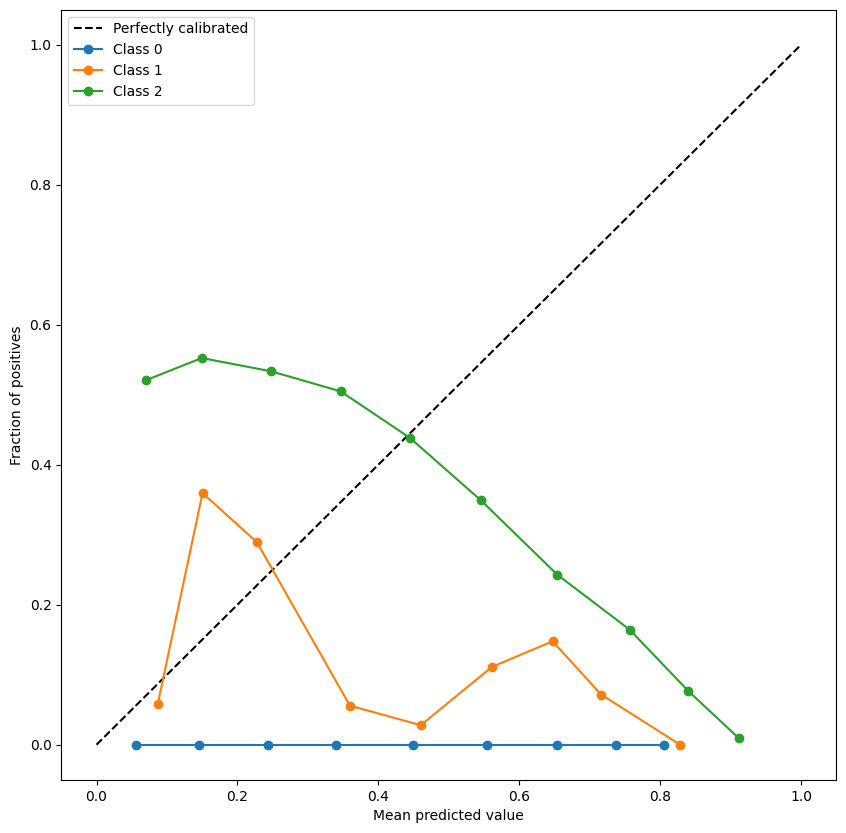

In [82]:
from sklearn.calibration import calibration_curve

probs = grid.predict_proba(X_test)


plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")

for i in range(probs.shape[1]):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test==i, probs[:, i], n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "o-", label=f"Class {i}")

plt.ylabel('Fraction of positives')
plt.xlabel('Mean predicted value')
plt.legend()
plt.show()

**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [86]:
### Создание полиномиальных признаков

X_polinomial = X.copy()

cols_to_poly = [col for col in X_polinomial.columns if (X_polinomial[col].dtype != 'object') 
                                                    and (X_polinomial[col].nunique() > 2)]
for feature in X_polinomial[cols_to_poly].columns:
    for degree in [2, 3, 4]:
        X_polinomial[f'{feature}^{degree}'] = X_polinomial[feature] ** degree


In [87]:
X_polinomial.head(3)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Cancellation_Last_1Month^4,Var1^2,Var1^3,Var1^4,Var2^2,Var2^3,Var2^4,Var3^2,Var3^3,Var3^4
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,1600.0,64000.0,2560000.0,2116,97336,4477456,3600,216000,12960000
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,1444.0,54872.0,2085136.0,3136,175616,9834496,6084,474552,37015056
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,16,3721.0,226981.0,13845841.0,3136,175616,9834496,5929,456533,35153041


In [88]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [91]:
pipe.set_params(**grid.best_params_)
pipe.fit(X_pol_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.001)))])

In [92]:
print(classification_report(y_test, pipe.predict(X_pol_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.584     0.653      9612

    accuracy                          0.682     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.682     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

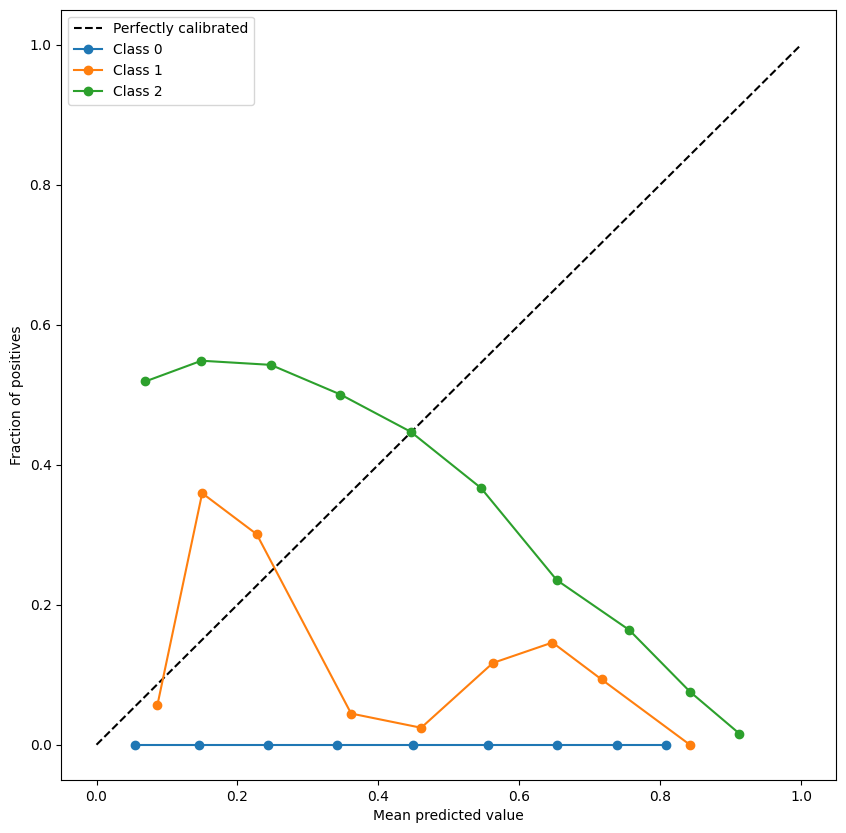

In [100]:
from sklearn.calibration import calibration_curve

probs = pipe.predict_proba(X_pol_test)


plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")

for i in range(probs.shape[1]):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test==i, probs[:, i], n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "o-", label=f"Class {i}")

plt.ylabel('Fraction of positives')
plt.xlabel('Mean predicted value')
plt.legend()
plt.show()

**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [101]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [103]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('one_vs_one', OneVsOneClassifier(SGDClassifier()))])

Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [104]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [106]:
grid = GridSearchCV(pipe, param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_one',
                                        OneVsOneClassifier(estimator=SGDClassifier()))]),
             param_grid={'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1],
                         'one_vs_one__estimator__loss': ['hinge', 'log',
                                                         'modified_huber'],
                         'one_vs_one__estimator__penalty': ['l1', 'l2']})

In [108]:
print(classification_report(y_test, grid.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.530     0.620      5372
           2      0.633     0.847     0.724     11349
           3      0.747     0.570     0.647      9612

    accuracy                          0.681     26333
   macro avg      0.709     0.649     0.664     26333
weighted avg      0.698     0.681     0.675     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?